In [1]:
# Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns

C:\Users\Dell Inspiron\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Cargando el archivo y agregando el nombre a cada columna
df = pd.DataFrame(np.load("proyecto_training_data.npy")\
                  ,columns = ['sale_price','overallquial','stfloor_square','room','year_built','lot_frontage'])

In [ ]:
# Verificando el tipo de cada columna
df.info()

In [3]:
# explorando los datos que LotFrontage: Linear feet of street connected to property tienen datos vacíos
# se procedio a colocar la media aritmetica
df['lot_frontage'] = df['lot_frontage'].fillna( df['lot_frontage'].mean() )
df['lot_frontage'] = df['lot_frontage'].astype(int)
df['year_built'] = df['year_built'].astype(int)
df["valor1"] = 1
                                               

### **Separando los datos 80% entrenamiento y 20% prueba**

##### forma 1 de separar los datos

In [ ]:
#aleatorios = np.random.rand(len(df)) <= 0.80
#entrenamiento = df[aleatorios]
#prueba = df[~aleatorios]

##### forma 2 de separar los datos

In [179]:
X = df.iloc[:,1:].values # seleccionando las variables independientes
y = df.iloc[:,:1].values # seleccionando la variable dependiente

In [180]:
# Obteniendo el 80% para el entrenamiento y el 20% prueba
X_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(X,y, test_size= 0.2 , random_state = 0 )


In [ ]:
# obteniendo la media, desviación estandar, valor minimo y máximo, el primer, segundo y tercer cuartil
df_entrenamiento = (pd.DataFrame(X_entrenamiento)).rename(columns= {0:'overallquial',1:'stfloor_square',2:'room',3:'year_built',4:'lot_frontage' })
print(df_entrenamiento.describe())

In [ ]:
# Rango
print(df_entrenamiento.max(axis= 0) - df_entrenamiento.min(axis= 0))

##### Histogramas
> Observando cada una de las variables en estudio, en donde se concentran los datos, es decir 
> la normalidad de cada variable

In [ ]:
sns.set_style("darkgrid")
hist1 = sns.histplot(data= df_entrenamiento , x="overallquial",binwidth = 1)
hist1.set_title("Overall material and finish quality")
hist1.set(ylabel="Cantidad")
plt.show()

In [ ]:
sns.set_style("darkgrid")
hist2 = sns.histplot(data= df_entrenamiento , x="stfloor_square")
hist2.set_title("First Floor square feet")
hist2.set(ylabel="Cantidad")
plt.show()

In [ ]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="room", binwidth= 1)
hist3.set_title("Total rooms above grade (does not include bathrooms)")
hist3.set(ylabel="Cantidad")
plt.show()

In [ ]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="year_built")
hist3.set_title("Original construction date")
hist3.set(ylabel="Cantidad")
plt.show()


In [ ]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="lot_frontage")
hist3.set_title("Linear feet of street connected to property")
hist3.set(ylabel="Cantidad")
plt.show()


##### funcion para los coeficiente de correlación de cada una de las variables

In [ ]:

def coeficiente_correlacion(matriz_y, matriz_x):
    """ Función que genera el coeficiente de correlación entre las variables en estudio """
    lista = ['overallquial','stfloor_square','room','year_built','lot_frontage']
    coeficiente = []
    for i in range(0,len(matriz_x[0])-1):
        coef = np.corrcoef(matriz_y[:,0],matriz_x[:,i])
        a = ("Correlación entre sales_price y "+ str(lista[i])+" "+ str(round ((coef[0][1]),3) ))
        coeficiente.append(str(a))
    return coeficiente

In [ ]:
# Coeficiente de correlación
coeficiente_correlacion(y_entrenamiento,X_entrenamiento)

##### Función para las gráficas de dispersión
> La gráfica de dispersión permite detectar patrones o relaciones entre las dos variables. Si los puntos están muy dispersos, esto sugiere que no hay una relación fuerte entre las dos variables. Si los puntos están dispuestos en una línea o en una forma no lineal, esto sugiere que hay una relación entre las dos variables.

In [ ]:
def scatter(variable_x, coeficiente=0):
    """ Función que realiza el gráfico de dispersión  """
    plt.scatter(x = df_entrenamiento[[variable_x]], y= pd.DataFrame(y_entrenamiento),color = 'red')
    plt.title("sales price and"+" "+variable_x+" / "+ "coef. correlación ="+coeficiente_correlacion(y_entrenamiento,X_entrenamiento)[coeficiente][-5:]   )
    plt.xlabel(variable_x)
    plt.ylabel("Sales price")
    return plt.show()

In [ ]:
scatter('overallquial') 

In [ ]:
scatter('stfloor_square',1)

In [ ]:
scatter('room',2)

In [ ]:
scatter('year_built',3)

In [ ]:
scatter('lot_frontage',4)


## <center> Regresión lineal   

### <center> ${y = \beta_0 + \beta_1 X}  $

##### Ecuación de la línea recta

###  ${y = \beta_0 + \beta_1 X}  $
En la regresión lineal, la ecuación de la línea recta se utiliza para modelar la relación entre las variables independientes y dependientes. 

Hay diferentes formas de calcular la regresión lineal matemáticamente y en esta ocasión se muestra por medio de matrices de la siguiente manera:

$\hat{\beta}= (X'X)^{-1} X'Y$

> 1. $ {\beta} $ = es un vector de coeficientes de la regresión lineal
> 2. $ {x} $ = es una matriz de valores de variables independientes, donde cada fila representa una observación y cada columna representa una variable independiente
> 3. $ {y} $ = es un vector de valores de la variable dependiente
> 4. $ {x}^T $ = es la matriz transpuesta de X
> 5. $ ({x}^T {x})^-1 $ = es la matriz inversa de la matriz producto de $ {x}^T y {x} $

In [ ]:
# en este ejemplo se muestra como atraves del comando polyfit de numpy se puede calcular la regresion lineal, 
#  
X_ = X_entrenamiento[:,0]
Y_ = y_entrenamiento[:,0]
coefficients = np.polyfit(X_, Y_, deg=1)
print(" coeficientes de la regresion: " + "beta0 : "+ str(coefficients[1])+"   beta1 "+str(coefficients[0]) )


> donde:
> 1. ${y}$ es el precio de la vivienda (la variable dependiente)
> 2. ${x}$ es Calidad general de materiales y acabados de la vivienda (variable independiente)

##### Función de costo o pérdida
Mide el error promedio de los datos sin procesar (originales) y los datos estimados a partir de la regresion


##### Error cuadrático medio
El ECM representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales de la variable dependiente.

$ {ECM} = \frac{1}{N} \sum{i=1}^2 ({y_i}- \hat{y})^2 =   {ECM} = \frac{1}{N}  \sum_{i=1}^N  (y_i - \beta_0 - \beta_1 X_1)^2  $

donde:

> 1. $ {n} $ es el número de observaciones
> 2. $ {y} $ es el valor real de la variable dependiente
> 3. $ \hat{y}$ es el valor predicho de la variable dependiente


#### El gradiente descendiente
##### En los modelos de machine learning se utilizan para  minimizar el error cuadrático medio

$ \frac{\delta e}{\delta \beta_1} = \frac{1}{n}  \sum_{i=0}^N ((\hat{y} - y)* x) $

$ \frac{\delta e}{\delta \beta_0} = \frac{1}{n}  \sum_{i=0}^N ((\hat{y} - y)) $

##### Entonces la deriva de cada una es


$ \beta_0 = - \frac{2}{N} \sum_{i=1}^N (y_i - \beta_1 x - \beta_0) = {\beta_0}^i+1 = {\beta_0}^i -{\alpha} * \frac{\delta e}{\delta \beta_1} $ 

$ \beta_1 = - \frac{2}{N} \sum_{i=1}^N x(y_i - \beta_1 x - \beta_0)  =   {\beta_1}^i+1 = {\beta_1}^i -{\alpha} * \frac{\delta e}{\delta \beta_1}    $ 


#### Implementación de la regresión lineal en python

In [187]:

def pasos(epocas_, learning_rate,iteracion_epocas , x ,y  ):
    #función de la regresión lineal
    def regresion(beta0,beta1,x):
        return  beta0 + beta1*x
    #función del cálculo del error
    def _error(y,y_estimada):
        N = y.shape[0]
        error = np.sum((y-y_estimada)**2)/N
        return error
    
    # Funcion del descenso del gradiente
    def g_descendiente(w_, b_, alfa, x, y):
    # El alfa es el learning rate que se elige, es decir el porcentaje de como cambia o se actualiza los pesos en cada iteración
        N = x.shape[0]     # donde N son los datos del modelo

    # Calculando las derivadas del gradiente descendiente que permite minimizar la pérdida del Error Cuadrático Medio (ECM)
   
    # Parametro que le pertenece a la derivada parcial de beta0
        beta_0 = -(2/N)*np.sum(y-(w_*x+b_))   
    # Parametro que le pertenece a la derivada parcial  de beta1
        beta_1 = -(2/N)*np.sum(x*(y-(w_*x+b_)))

    # Entonces, ahora se estarán actualizando los pesos de cada parametro, es decir la derivada de beta1 y beta2
    #Actualizar los pesos usando la fórmula del gradiente descendente
        beta0 = b_ - alfa * beta_0
        beta1 = w_ - alfa * beta_1
    
        return beta1, beta0
   
    #La razón por la cual se utilizan valores aleatorios para inicializar los parámetros del modelo es que si se inicializan 
    #los parámetros en cero o en cualquier otro valor fijo, el algoritmo de gradiente descendente puede quedar atrapado en un mínimo local
    #y no lograr converger al mínimo global que minimiza el error cuadrático medio. En cambio, al inicializar los parámetros
    #en valores aleatorios, se evita este problema y se aumenta la probabilidad de que el algoritmo encuentre el mínimo global.

    np.random.seed(2)
    beta1 = np.random.randn(1)[0]
    beta0 = np.random.randn(1)[0]

    alfa = learning_rate # tambien es conocido como learning rate 0.0009
    epocas = epocas_ # Número de epocas que tendrá el modelo


    error = np.zeros((epocas,1))
    
    for i in range(epocas):
    # Descenso del gradiente que permite en cada iteracion actualizar el peso de cada valor
        [beta1, beta0] = g_descendiente(beta1,beta0,alfa,x,y)

    # Y estimada de la regresión
        y_estimada = regresion(beta0,beta1,x)

     # Error Cuadrático Medio = ECM
        N = y.shape[0]
        error[i] = _error(y,y_estimada)
    
    # Imprimir resultados cada 1000 epochs
        if (i+1)% iteracion_epocas == 0:  # cadad cuanto es necesario imprimir los datos por ejemplo de 100, se requiere de 10 en 10
            print("Época {}".format(i+1)) # imprime las épocas
            print("    beta1: {:.1f}".format(beta1), " beta0: {:.1f}".format(beta0)) # imprime los coeficientes
            print("    error: {}".format(error[i])) # imprime el erro de cada iteración 
            print("---------------------------------------")
    
    # Plot del descendiente del gradiente

    plt.plot(range(epocas_), error)
    plt.xlabel('Época')
    plt.title("Descenso del gradiente, Época = {epocas} ".format(epocas =str( epocas_)  ), fontsize = 13 )
    plt.suptitle("Gráfica")
    plt.ylabel('Error cuadradico medio')
    plt.show()
    
    return beta0,beta1, epocas,error, plt.show() 

Época 20
    beta1: 24102.9  beta0: 3582.4
    error: [4.08632247e+09]
---------------------------------------
Época 40
    beta1: 28701.2  beta0: 4110.8
    error: [2.8324006e+09]
---------------------------------------
Época 60
    beta1: 29597.6  beta0: 4059.9
    error: [2.78551186e+09]
---------------------------------------
Época 80
    beta1: 29791.4  beta0: 3899.2
    error: [2.78210731e+09]
---------------------------------------
Época 100
    beta1: 29851.8  beta0: 3718.1
    error: [2.78027549e+09]
---------------------------------------


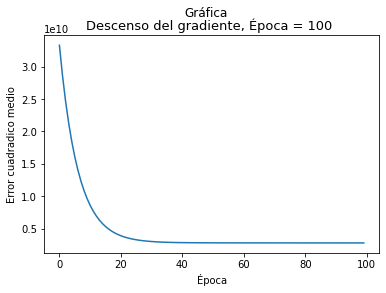

In [244]:
p = pasos(100,0.001,20,  X_entrenamiento[:,0], y_entrenamiento[:,0] )

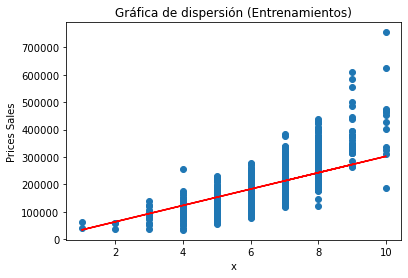

In [191]:
x_p = X_entrenamiento[:,0]
y_estimada = p[0]+p[1]*x_p

plt.scatter(x_p,y_entrenamiento[:,0])
plt.plot(x_p,y_estimada,'r')
plt.title("Gráfica de dispersión (Entrenamientos)")
plt.xlabel('x')
plt.ylabel('Prices Sales')
plt.show()

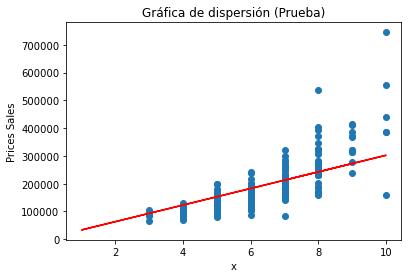

In [193]:
x_pr = x_prueba[:,0]
y_estimada= p[0]+p[1]*x_p

plt.scatter(x_pr,y_prueba[:,0])
plt.plot(x_p,y_estimada,'r')
plt.title("Gráfica de dispersión (Prueba)")
plt.xlabel('x')
plt.ylabel('Prices Sales')
plt.show()

In [243]:

def prediccion(x_prueba):
    lista=x_prueba
    y_predictivo = []
    x_valores = []
    for i in range(0 , (len(x_prueba)) ):
        y_predictivo.append((np.array(p[0])).astype(int) + (np.array(p[1]))*list(lista)[i])
        x_valores.append(list(lista)[i] )
    
    df = pd.DataFrame()
    df["y_estimado"] = pd.Series(y_predictivo)
    df["valores_de_x"] = pd.Series(x_valores)
    return df

prediccion(x_prueba[:,0]).head(2)

,y_estimado,valores_de_x
0,182828.741219,6.0
1,182828.741219,6.0


## Usando sklearn

In [213]:
# Datos
X_s = df.iloc[:, 1:2].values
y_s = df.iloc[:, :1].values 

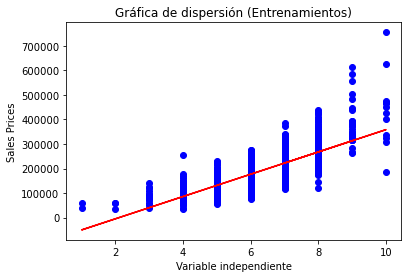

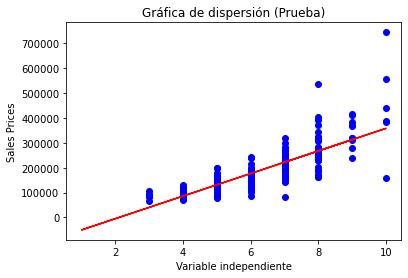

In [214]:
# Obteniendo el 80% para el entrenamiento y el 20% prueba

X_entrenamiento_s, x_prueba_s, y_entrenamiento_s, y_prueba_s = train_test_split(X_s, y_s, test_size =0.2, random_state = 0)

# Ajustando la regresión lineal simple a los datos de entrenamiento
regresion = LinearRegression()
regresion.fit(X_entrenamiento_s, y_entrenamiento_s)

# Prediccion de los resultados
y_pred = regresion.predict(x_prueba_s)

# Resultados con el de entrenamiento
plt.scatter(X_entrenamiento_s, y_entrenamiento_s, color = 'blue')
plt.plot(X_entrenamiento_s, regresion.predict(X_entrenamiento_s), color = 'red')
plt.title('Gráfica de dispersión (Entrenamientos)')
plt.xlabel('Variable independiente')
plt.ylabel('Sales Prices')
plt.show()

# Resultados con el de prueba (test)
plt.scatter(x_prueba_s, y_prueba_s, color = 'blue')
plt.plot(X_entrenamiento_s, regresion.predict(X_entrenamiento_s), color = 'red')
plt.title('Gráfica de dispersión (Prueba)')
plt.xlabel('Variable independiente')
plt.ylabel('Sales Prices')
plt.show()

## Comparación de $ \hat{y} $  del modelo manual vs. sklearn

In [217]:
y_estimada_sklearn =   pd.Series(np.squeeze(regresion.predict(X_entrenamiento_s)))

In [ ]:
y_estimada_manual =  pd.Series( np.squeeze( p[0]+p[1]*X_entrenamiento[:,0]))

In [240]:
df_estimada = pd.DataFrame()
df_estimada['y_estimada_sklearn'] = y_estimada_sklearn
df_estimada['y_estimada_manual'] = y_estimada_manual
df_estimada["X_entrenamiento"] = pd.Series( np.squeeze(X_entrenamiento_s))
df_estimada["promedio_sk_man"] = (df_estimada.y_estimada_sklearn +  df_estimada.y_estimada_manual)/2 

In [251]:
df_estimada.head(5)

,y_estimada_sklearn,y_estimada_manual,X_entrenamiento,promedio_sk_man
0,313043.958877,272384.173315,9.0,292714.066096
1,131497.617451,152977.012502,5.0,142237.314976
2,131497.617451,152977.012502,5.0,142237.314976
3,267657.373521,242532.383111,8.0,255094.878316
4,222270.788164,212680.592908,7.0,217475.690536


#### Estimando la variable dependiente